<a href="https://colab.research.google.com/github/wangjiatao/curve_yield_and_space_distance/blob/main/curve_yield_and_space_distance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install akshare --upgrade

Requirement already up-to-date: akshare in /usr/local/lib/python3.7/dist-packages (0.8.40)


In [ ]:
import pandas as pd 
import akshare as ak
import numpy as np 

bondzmdf=ak.bond_zh_us_rate()
totaltw=500
bondzm=bondzmdf.iloc[0:totaltw,:]




100%|██████████| 16/16 [00:05<00:00,  2.72it/s]


In [ ]:
bcdf=bondzm.iloc[:,[1,3]]
bcdf.dropna(inplace=True)
bc2=bcdf.iloc[0:totaltw, 0] # non reverse pd
bc10=bcdf.iloc[0:totaltw, 1]

b2v, b10v=np.array(bc2), np.array(bc10)

idx_tw=0
tw=10
eud_c=np.zeros(int(totaltw/10))

for idx_tw in range(int(totaltw/10)):
	b2v_temp, b10v_temp=b2v[idx_tw:idx_tw+9], b10v[idx_tw:idx_tw+9]
	eud_temp=np.linalg.norm(b10v_temp-b2v_temp,ord=1)
	eud_c[idx_tw]=eud_temp
	idx_tw=idx_tw+1;

eudc=eud_c[::-1]

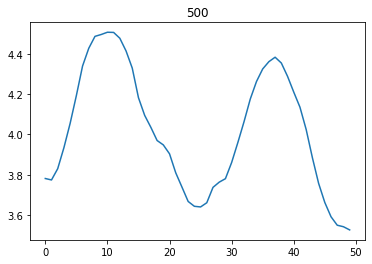

In [ ]:
import matplotlib.pyplot as plt
plt.figure()
plt.title(str(totaltw))
myfig=plt.gcf()
plt.plot(eudc)